<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/example_make_moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import os.path
import requests
from numpy import genfromtxt
from sklearn import cluster, datasets, mixture
from sklearn.datasets import make_moons, make_circles, make_classification, make_gaussian_quantiles
import pandas as pd
!mkdir data #let us create data folder to hold our data

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [5]:
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
pd.DataFrame(noisy_moons[0]).head()

,0,1
0,0.671899,0.766804
1,0.521495,0.932264
2,-0.824034,0.375000
3,1.842396,-0.113866
4,1.979767,0.331428


In [6]:
data = noisy_moons[0]
data_labels = noisy_moons[1]
#file_2d = 'data/classification-2d.txt'

classification dataset : Groundtruht


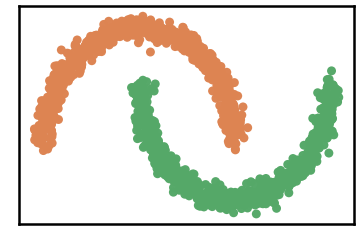



classification dataset : DenMune Clustering


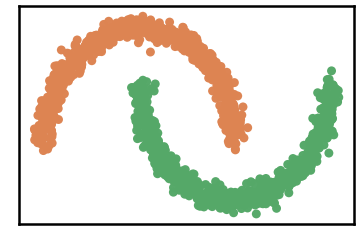

DenMune Analyzer
├── exec_time
│   ├── DenMune: 0.479
│   └── NGT: 0.037
├── n_clusters
│   ├── actual: 2
│   └── detected: 2
├── n_points
│   ├── dim: 2
│   ├── noise
│   │   ├── type-1: 0
│   │   └── type-2: 0
│   ├── size: 1500
│   ├── strong: 853
│   └── weak
│       ├── all: 647
│       ├── failed to merge: 0
│       └── succeeded to merge: 647
└── validity
    ├── ACC: 1500
    ├── AMI: 1.0
    ├── ARI: 1.0
    ├── F1: 1.0
    ├── NMI: 1.0
    ├── completeness: 1.0
    └── homogeneity: 1.0

k= 24 F1 score is: 1.0


In [9]:
# Denmune's Paramaters
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_groundtrugh = True  # show plots on/off
show_noise = True # show noise and outlier on/off

knn = 24
dm = DenMune(data=data,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=True )
labels_pred = dm.fit_predict()

if show_groundtrugh:
    # Let us plot the groundtruth of this dataset
    print ("classification dataset", ": Groundtruht")
    dm.plot_clusters(labels=data_labels, ground=True)
    print('\n', "=====" * 20 , '\n')       

# Let us plot the results produced using DenMune
print ("classification dataset", ": DenMune Clustering")
dm.plot_clusters(labels=labels_pred, show_noise=show_noise)

validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
validity_key = "F1" 
# Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
print ('k=' , knn, validity_key , 'score is:', round(validity[validity_key],3))